<hr/>

#Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 4** - Sept 8, 2015

- Bivariate and Multivariate
- Method of Least Squares

<hr/>

<h1><font color="darkblue">Bivariate and Multivariate</font></h1>

### Dependence
- Consider random variables $X$, $Y\in\mathbb{R}$

> We can look at them separately but ...
>
> Are they "related" at all?

- Dependent variables

>$\displaystyle P(X Y) \neq P(X)\,P(Y)$ 
> 
>More on this later...

### Covariance

- Definition 

>$\displaystyle \mathbb{Cov}[X,Y]=\mathbb{E}\Big[\big(X-\mathbb{E}[X]\big)\big(Y-\mathbb{E}[Y]\big)\Big]$  
>
> Other notations: $\mathrm{C}_{X,Y}$, $\sigma(X,Y)$, ...

- Sample covariance

>$\displaystyle C = \frac{1}{N\!-\!1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})$

### Correlation

- Definition

>$\displaystyle \mathbb{Corr}[X,Y] = \frac{\mathbb{Cov}[X,Y]}{\sqrt{\mathbb{Var}[X]\, \mathbb{Var}[Y]}}$
>
> Takes values in $[-1,1]$ (Cauchy-Schwartz inequality)
>
> Other notations: $\rho$, $r$, ...

- Sample correlation

> ...

### Examples

<img src="files/Correlation_coefficient.png" width=500 align="left">

### Quiz

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [ ] Yes      [ ] No
        
2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [ ] No

### Answers

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [x] Yes      [ ] No

> Independence yields $ \mathbb{E}[XY]=\mathbb{E}[X]\ \mathbb{E}[Y]$, hence the covariance
>$ \mathbb{E}[ (X\!-\!\mu_X)(Y\!-\!\mu_Y) ] = \mathbb{E}[ XY - X \mu_y - \mu_X Y  + \mu_X\mu_Y] = 0$

2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [x] No


> For example, let random variable $X$ have a normal distribution, $X\sim{}\cal{N}(0,1)$, and let $Y=X^2$.
> They are clearly dependent but are they correlated?
>
>$\mathbb{E}[ (X\!-\!0)(X^2\!-\!\mu_{X^2}) ] = \mathbb{E}[X^3-X\,\mu_{X^2}] $ $= \mathbb{E}[X^3] - \mathbb{E}[X]\,\mu_{X^2} = 0 - 0$ 

### More examples

<img src="files/600px-Correlation_examples2.svg.png" width=500 align="left">



### Vector Notation

- Let $\boldsymbol{V}$ represent the 2-vector of random scalar variables $X$ and $Y$

>$\boldsymbol{V} = \begin{pmatrix}X\\Y\end{pmatrix}$

- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{V}] = \begin{pmatrix}\mathbb{E}[X]\\\mathbb{E}[Y]\end{pmatrix} = \begin{pmatrix}\mu_X\\\mu_Y\end{pmatrix}$

- Covariance matrix

>$\displaystyle \Sigma(\boldsymbol{V}) = \mathbb{E}\Big[\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)^T\Big]$ $ = \left( \begin{array}{ccc}
\sigma_X^2 & \mathrm{C}_{X,Y}  \\
\mathrm{C}_{X,Y} & \sigma_Y^2  \end{array} \right)$
>
> Same generalization of variance works in any dimensions



### Bivariate Normal Distribution
- Independent and uncorrelated

>$ \displaystyle {\cal N}(x,y;\mu_x,\mu_y,\sigma_x,\sigma_y) = \frac{1}{2 \pi \sigma_x \sigma_y}\ \exp\left[-\frac{(x\!-\!\mu_x)^2}{2\sigma_x^2} -\frac{(y\!-\!\mu_y)^2}{2\sigma_y^2} \right] $

- In general for 2-vector $\boldsymbol{x}$

>$ \displaystyle{\cal N}(\boldsymbol{x};\boldsymbol{\mu},\Sigma) = \frac{1}{2\pi |\Sigma|^{\frac{1}{2}} }\ \exp\left[-\frac{1}{2} (\boldsymbol{x}\!-\!\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}\!-\!\boldsymbol{\mu})\right]$
>
> where $|\Sigma|$ is the determinant - other notation $\det\Sigma$ or $\det\!\left(\Sigma\right)$

- Uncorrelated if

>$ \displaystyle \Sigma = \left( \begin{array}{ccc}
\sigma_X^2 & 0  \\
0 & \sigma_Y^2  \end{array} \right)$

### Multivariate Normal Distribution

- In $k$ dimensions - not bold but $k$-vectors


>$ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^{k} |\Sigma|} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$

### Sampling from Gaussians
- Uncorrelated ${\cal N}(0,I)$: Box-Muller transform 

> Using 2 uniform randoms between 0 and 1
>
>$ Z_1 = \sqrt{-2\ln U_1}\,\cos(2\pi U_2)$ 
>
>$ Z_2 = \sqrt{-2\ln U_1}\,\sin(2\pi U_2)$ 

- Tranform: scale, rotate, shift


In [1]:
%pylab inline 
from scipy.stats import norm as gaussian

Populating the interactive namespace from numpy and matplotlib


Average:
[[ 1.88070265]
 [ 4.89369218]]
Cov:
[[ 4.76685694  3.90140734]
 [ 3.90140734  5.04366393]]


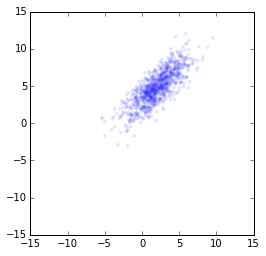

In [2]:
# generate many 2D (column) vectors
X = gaussian.rvs(0,1,(2,1000))
X[0,:] *= 3  # scale axis 0
f = +pi/4   # rotate by f
R = array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
V = dot(R,X)
V += np.array([[2],[5]]) # shift
# plot on square figure
figure(figsize=(4,4)); a=15;xlim(-a,a);ylim(-a,a)
plot(V[0,:],V[1,:], '.', alpha=0.1)

# sample covariance matrix
avg = mean(V, axis=1).reshape(V[:,1].size,1)
print "Average:"
print avg
print "Cov:"
print dot(V-avg,(V-avg).T) / (V[0,:].size-1) 

<h1><font color="darkblue">Method of Least Squares</font></h1>

### The Idea

- Fit a model to training set $\big\{ (x_i, y_i) \big\}$

> Parameterized function $f(x;\theta)$, where $\theta$ can represent multiple parameters

- Minimize the mean or sum of square errors or residuals (SSE, SSR, MSE, MSR?)

> Residual   
>$r_i(\theta) = y_i - f(x_i;\theta)$
>
> Estimation  
>$\displaystyle \hat{\theta} = \mathrm{argmin} \sum_i \big[y_i-f(x_i;\theta)\big]^2$
 
- Optimization is simple for certain models

### The Simplest Case
- Fitting a constant? Model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \big(y_i\!-\!\mu\big)^2$

- Derivative $C'= dC/d\mu$ vanishes at solution $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N y_i - N \hat{\mu} = 0 $
>
>$\displaystyle \hat{\mu} = \frac{1}{N}\sum_{i=1}^N y_i \ \ \ \ \ $  -  average

### Heteroscedasticity
- Same model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \frac{\big(y_i\!-\!\mu\big)^2}{\sigma_i^2} $
>
> with  $\ w_i=1/\sigma_i^2$
>
>$\displaystyle  C(\mu) = \sum_{i=1}^N w_i\big(y_i\!-\!\mu\big)^2 $

- Derivative $C'= dC/d\mu$ vanishes at $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N w_i \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N w_i y_i - \hat{\mu}\sum_{i=1} w_i  = 0 $
>
>$\displaystyle \hat{\mu} = \frac{\sum w_i y_i}{\sum w_i} \ \ \ \ \ \ $ - weighted average

### Simple Fitting
- A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a + b\,x$
  
>$\displaystyle \hat{\boldsymbol\theta} = \mathrm{argmin} \sum_i \big[y_i-(a + b\,x_i)\big]^2$

- Derivatives w.r.t. $a$ and $b$ should vanish

> We have 2 variables and 2 equations

> Quadratic becomes linear $\rightarrow$ analytic solution!

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ functions (basis functions)

>$\displaystyle f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x) $

> It's a dot product

>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol\beta^T \boldsymbol\phi(x)$ 

>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$


- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K \beta_k\, \phi_k(x_i) \right\}^2$




### Minimization

- Partial derivatives
  

>$\displaystyle \frac{\partial{}C}{\partial{}\beta_l} = 2\sum_i \Big\{ \dots\Big\} 
\left[ -\frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} \right]$

> and

>$\displaystyle X_{il} = \frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} =\sum_k \frac{\partial{}\beta_k}{\partial{}\beta_l}\,\phi_k(x_i) = \phi_l(x_i)$

> **Note:** $\partial{}\beta_k/\partial{}\beta_l=\delta_{kl}$ Kronecker delta

### Detour: The Kronecker Delta

- Definition

>$ \delta_{kl} = \left\{ \begin{array}{ll}
         1 & \mbox{if $k=l$}\\
         0 & \mbox{if $k\neq{}l$}\end{array} \right.  $
         
- Useful to remember

>$ \displaystyle \sum_l \delta_{kl}\,a_l = a_k$

> Cf. identity matrix:
>$ I\, \boldsymbol{a} = \boldsymbol{a}$

### Result

- At the optimum we have


>$\displaystyle \sum_i \left\{ y_i - \sum_{k} \hat\beta_k\, \phi_k(x_i) \right\}\, \phi_l(x_i)  = 0$

>$\displaystyle \sum_i y_i X_{il} - \sum_i \sum_k \hat{\beta}_k X_{ik} X_{il}= 0$

>$\displaystyle \sum_i  X_{il} y_i = \sum_k \left(\sum_i X_{il} X_{ik}\right) \hat{\beta}_k$

- I.e.,

>$\displaystyle X^T y = X^T X \hat{\beta} $

>$\displaystyle \hat\beta = (X^T X)^{-1} X^T y = X^+ y$

- See **Moore-Penrose pseudoinverse**, **generalized inverse**

- See also **Singular Value Decomposition**

### Hat matrix

- Looking at the definition of $X$ we see that the model at $\hat{\beta}$ predicts $\hat{y}_i$ values

>$\displaystyle \hat{y} = X\hat\beta = X (X^T X)^{-1} X^T y $

> which is

>$\displaystyle \hat{y}  = H\,y\ \ \ $
> with 
>$\ \ \displaystyle {H} = X (X^T X)^{-1} X^T$

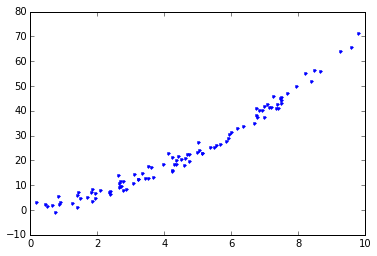

In [3]:
# generate sample with error
x = 10 * random.rand(100) # between 0 and 10
e =  2 * random.randn(x.size) # noise
y = (0.5*x*x + 2*x + 1) + e;  plot(x,y,'.');

[-7.39318751  6.83545411]


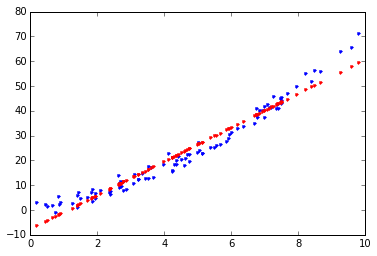

In [4]:
# linear model f(x) = b0 + b1 x
X = ones((x.size,2));
X[:,1] = x

Xpinv = dot( inv(dot(X.T,X)), X.T )
bHat = dot(Xpinv,y)
print bHat
yHat = dot(X,bHat)

plot(x,y,'.'); plot(x,yHat,'.r');

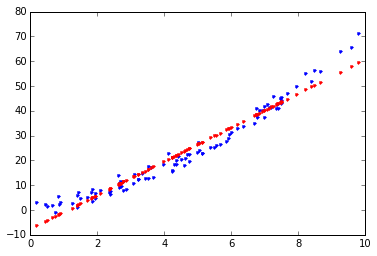

In [5]:
# linear model f(x) = b0 + b1 x
X = ones( (x.size,2));
X[:,1] = x # partials wrt. b1

H = dot(X,linalg.pinv(X))
yHat = dot(H,y)

plot(x,y,'.'); plot(x,yHat,'.r');

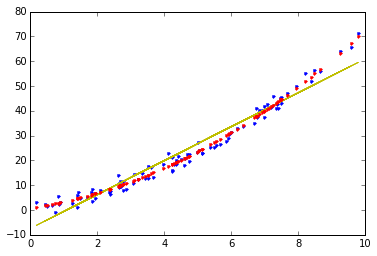

In [6]:
# linear model f(x) = b0 + b1 x + b2 * x^2
X = ones( (x.size,3));
X[:,1] = x # partials wrt. b1
X[:,2] = x*x # wrt. b2

H = dot(X,linalg.pinv(X))
yHat2 = dot(H,y)

plot(x,y,'.'); plot(x,yHat,'-y'); plot(x,yHat2,'.r');

### Please DO try this at home!
- Change the code cells anyway you like
- Generate different data
- Obtain different fits
- Etc...